### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
import seaborn as sns

In [6]:
df=pd.DataFrame(lista_alumnos, columns=["Name","Age","Height"])
df.head()

,Name,Age,Height
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


<AxesSubplot:xlabel='Age', ylabel='Height'>

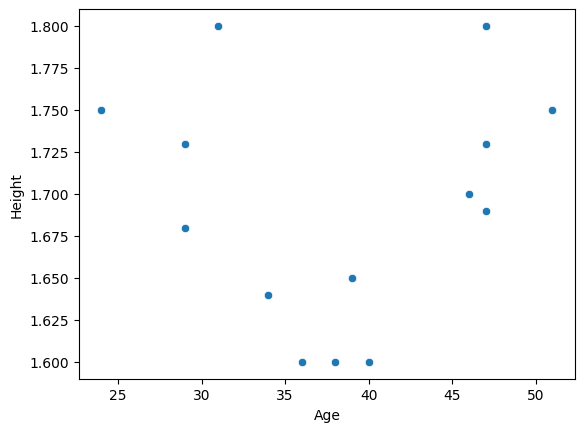

In [7]:
sns.scatterplot(x="Age",y="Height",data=df)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

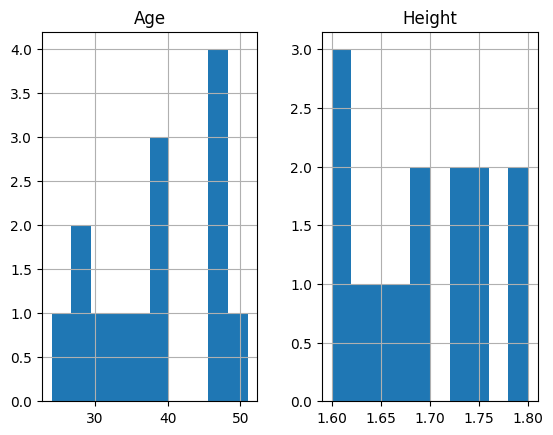

In [9]:
df[["Age","Height"]].hist()

In [10]:
x=df[["Age"]]
y=df[["Height"]]

In [11]:
sc=StandardScaler()
sc.fit_transform(x)

lm=LinearRegression()
lm.fit(x,y)

y_hat=lm.predict(x)

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

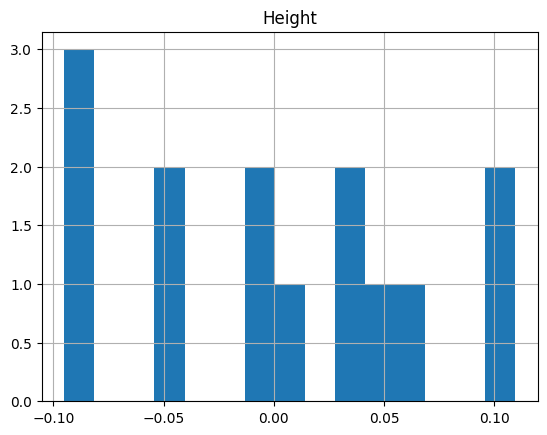

In [13]:
res=y-y_hat
res.hist(bins=15)

<AxesSubplot:>

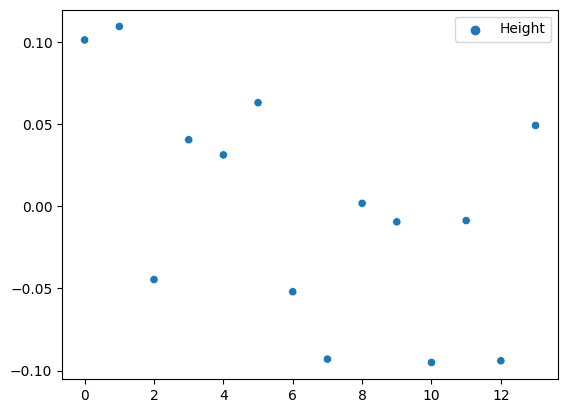

In [14]:
sns.scatterplot(res)

<AxesSubplot:xlabel='Age', ylabel='Height'>

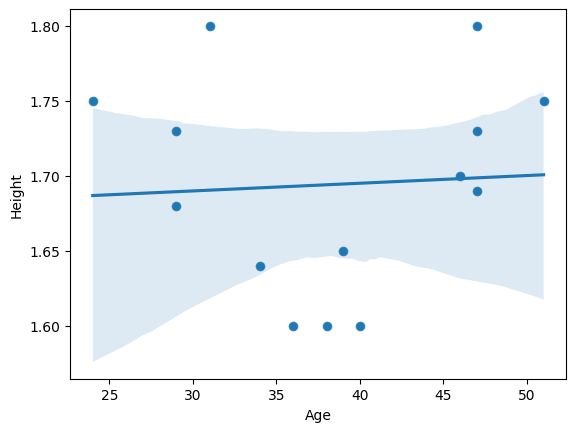

In [19]:
def line(x,model):
    return model.coef_[0]*x+model.intercept_

x=np.linspace(20,60)

sns.scatterplot(x="Age",y="Height",data=df)
sns.regplot(x="Age",y="Height",data=df)


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"MAE:{mean_absolute_error(y,y_hat):.3f}")
print(f"RMSE:{np.sqrt(mean_squared_error(y,y_hat)):.3f}")
print(f"R^2:{r2_score(y,y_hat):.4f}")


MAE:0.057
RMSE:0.067
R^2:0.0038


In [21]:
df.corr()

,Age,Height
Age,1.000000,0.061501
Height,0.061501,1.000000
